In [1]:
!pip install d2l==0.16.2 matplotlib scipy numpy

zsh:1: command not found: pip


In [2]:
from d2l.torch import plot
import matplotlib.pyplot as plt
import scipy.stats as scs
import numpy as np

%matplotlib inline

# Calculus

Calculus is a branch of mathematics that helps us understand changes between values that are related by a function.

There are two different types of calculus. **Differential** calculus divides things into small (different) pieces, and tells us how they change from one moment to the next, while **integral** calculus joins (integrates) the small pieces together, and tells us how much of something is made, overall, by a series of changes

## Two primary branches: Differentiation vs Integration

### Integration

At least in the context of machine learning and statistics it is commonly used to find the area of distributions. 

#### Grading on a curve: An Example

We're a looking taking a class that is graded on a bell curve or normal distribution (or gaussian if we're very fancy). The average grade should be a 75.

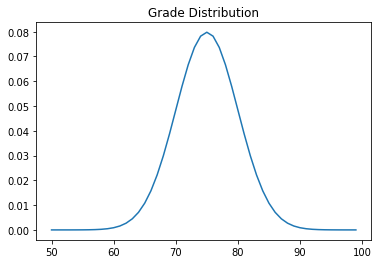

In [3]:
norm_pdf = scs.norm(loc=75, scale=5)
grade_range = np.arange(50, 100)
grade_dist_probs = norm_pdf.pdf(grade_range)

plt.plot(grade_range, grade_dist_probs)
plt.title('Grade Distribution')
plt.show()

How can we find the probability of a student above 80 in the class? 

How about if we made a bunch of rectangles and put them in the bell curve and then added all of their respective areas? 

What should we consider here? 

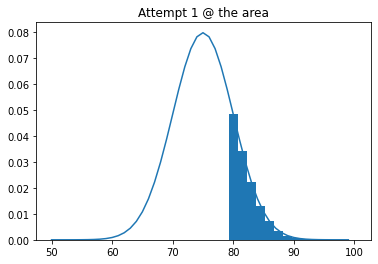

In [4]:
guess_x = np.arange(80, 100, 1.5)
guess_prob = norm_pdf.pdf(guess_x)

plt.plot(grade_range, grade_dist_probs)
plt.bar(guess_x, guess_prob, width=1.5)
plt.title('Attempt 1 @ the area')
plt.show()

This is pretty good, but we can do better, what if we make the rectangles smaller and try again? 

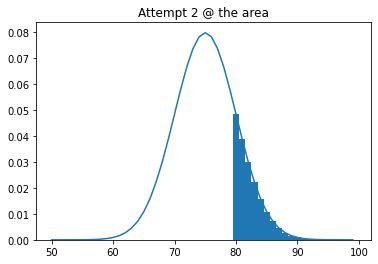

In [5]:
guess_x = np.arange(80, 100, 1)
guess_prob = norm_pdf.pdf(guess_x)

plt.plot(grade_range, grade_dist_probs)
plt.bar(guess_x, guess_prob, width=1)
plt.title('Attempt 2 @ the area')
plt.show()

We're getting there, but let's give it one more try!

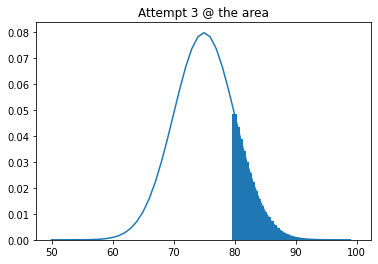

In [6]:
guess_x = np.arange(80, 100, .5)
guess_prob = norm_pdf.pdf(guess_x)

plt.plot(grade_range, grade_dist_probs)
plt.bar(guess_x, guess_prob)
plt.title('Attempt 3 @ the area')
plt.show()

I think we got there -- what we did was integrating over the grade function to find the area! This is integral calculus!!

At their cores, integration and differentiation are fairly intiutive. Of course they can get more compex as functions get complex but the idea remains the same!






#### Some notes about integration & it's common notation

$ \sum $ vs $\int$

These two are really the same, the one of the right (I like to think of it as a funky looking s for sum. Is used when we're talking about integrating. Don't get tripped up on the notation. 

So when you see **$\int$** just think **'the sum of'**!

Another piece of notation that we should be aware of is **${dx}$**

**${d}$** just means a **'little bit of'**. So when we see **${dx}$** we mean **'a little bit of x'**

So putting it all together when we see **$\int {dx}$** we mean a **'Sum all of the little bits (rectangles in our case) of x'**

In our case it was the sum of those small rectangles to get the area

The word integral really means "the whole" - so we're taking the whole of all the little pieces... that's it!

### Differentiation

Differntiation, in the context of machine learning, is a key tool in finding parameters which result in the best performing model. 

Generally speaking we're finding the slope of the tangent line to a function or the rate of change at a particular point in time. (don't worry if that is gibberish) 

#### Figuring out how big of a data plan to buy: An Example

Say PwC IT has approached us as machine learning ethusiates and asked if we could come up with a model to tell them how many GB Per person they should expect, this will help them to budget as the firm grows and our data needs grow with it.



 

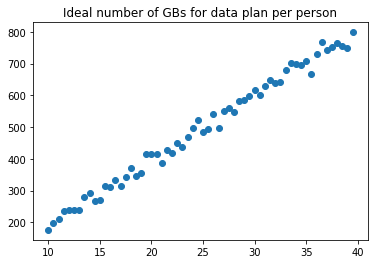

In [7]:
## We don't know this
ideal_gbs = 20

number_of_people = np.arange(10, 40, .5)
number_of_GBs_consumed = number_of_people * 20

elemnet_of_randomness = scs.norm(0, 15).rvs(len(number_of_GBs_consumed))
ideal_GBs = number_of_people * ideal_gbs + elemnet_of_randomness

plt.scatter(number_of_people, ideal_GBs)
plt.title("Ideal number of GBs for data plan per person")
plt.show()

#### First Estimate

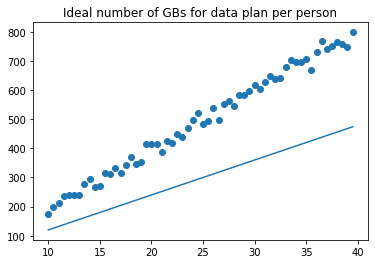

In [8]:
data_estimate_1 = number_of_people * 12

plt.plot(number_of_people, data_estimate_1)
plt.scatter(number_of_people, ideal_GBs)
plt.title("Ideal number of GBs for data plan per person")
plt.show()

Our guess isn't great, but how bad is it?

Let's devise a way to allow us to assess how far off we are from our goal of correctly knowing how much data to buy.. let's call it our **objective function**


MSE OR f(x) = ${ \frac{1}{N}\sum_{i=1}^{N} (y_{i} - \hat{y})^2}$

Where: 

- $y_{i}$ is our actual data needed for a given number of people
- $\hat{y}$ is our predicted or estimated data need

#### Evaluating our first model

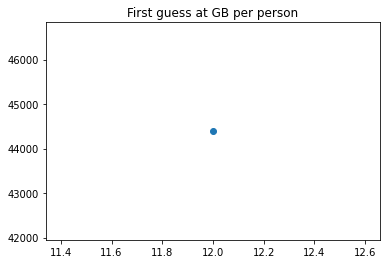

In [9]:
def objective_function(predictions, actual_value):
    return sum((predictions - actual_value) ** 2) / len(predictions)

first_guess = 12
GB_guess_1 = number_of_people * first_guess

how_bad_were_we = objective_function(GB_guess_1, ideal_GBs)

# plt.plot(possible_GBs, GB_function)
plt.scatter(first_guess, how_bad_were_we)
plt.title("First guess at GB per person")
plt.show()

Doesn't tell us much with just this context, let's move our guess slightly and see if we get better or worse

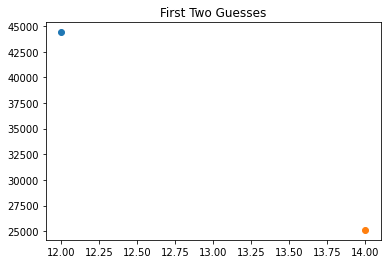

In [10]:
second_guess = 14
GB_guess_2 = number_of_people * second_guess

how_bad_were_we_2 = objective_function(GB_guess_2, ideal_GBs)

plt.scatter(first_guess, how_bad_were_we)
plt.scatter(second_guess, how_bad_were_we_2)
plt.title("First Two Guesses")
plt.show()

Looks better, let's fast forward and make a bunch of predictions and see what happens

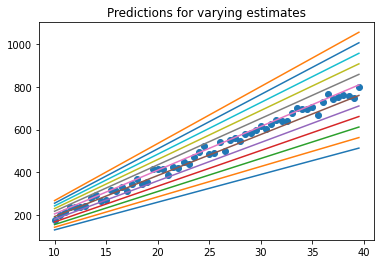

In [11]:
loss_over_guesses = []

guess_range = np.arange(13,28, .25)

for idx, gb_guess in enumerate(guess_range):
    predicted_gb = number_of_people * gb_guess
    if idx % 5 == 0:
        plt.plot(number_of_people, predicted_gb)
    loss_over_guesses.append(objective_function(predicted_gb, ideal_GBs))
    

plt.scatter(number_of_people, ideal_GBs)
plt.title("Predictions for varying estimates")
plt.show()

#### Why might the approach above not be desirable

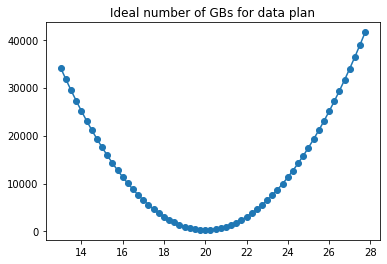

In [12]:
plt.plot(guess_range, loss_over_guesses)
plt.scatter(guess_range, loss_over_guesses)
plt.title("Ideal number of GBs for data plan")
plt.show()

In this made up world, we don't know the ideal number, but we can figure out the ideal number through trial and error. 

However, an observation in isolation isn't that helpful as we saw above nor is it computationally tractable to do what we did above (usually) -- enter the derivative!

#### Definition of a derivative 
The derivative of f with respect to x is given by  

$ f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$    


I like to look at this through the lens of **rise over run** from back in primary

A derivative is the slope of the tangent line at a particular point... meaning the sign (+/-) & steepness of the slope can help us make an informed decision about how to update our estimate (or parameters in a model)

Let's focus on the points below to see what this looks like in practice

[16.75 17.  ] [7613.829417317757, 6537.482891795175]


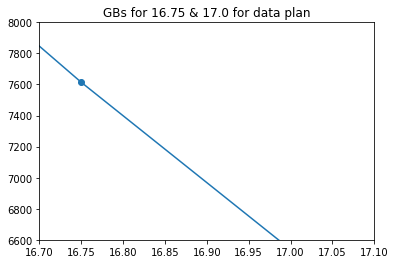

In [13]:
plt.plot(guess_range, loss_over_guesses)
plt.scatter(guess_range[15:17], loss_over_guesses[15:17])
print(guess_range[15:17], loss_over_guesses[15:17])

plt.title(f"GBs for {guess_range[15]} & {guess_range[16]} for data plan")
plt.xlim(16.7, 17.1)
plt.ylim(6600, 8000)
plt.show()

Looking at this we the two points and the line connecting them (rise over run) 

How could we tell which way will take us to toward the bottom of our loss? Or asked differently how should we nudged our input parameter (GB/Person) to decrease our loss. This is called **gradient descent** 

**Step 1**: Find $f(x)$

Let's take take our objective function Mean squared error: 

MSE OR f(x) = ${ \frac{1}{N}\sum_{i=1}^{N} (x_{i} - \hat{x})^2}$


and plug in our estimate of 16.75, we get our $f(x)$ , 7,774,15. 

So we now have:

$ f'(x) = \lim_{h \to 0} \frac{f(x+h) - 7774.15}{h}$  

**Step 2**: Let's use .25 as our $h$ and get our value for $f(x+h)$

Plugging in 16.75 + .25 into our objective function, we get our $f(x + h)$, 6680.37

So we now have:

$ f'(x) = \lim_{h \to 0} \frac{6680.37 - 7774.15}{.25}$ = -4,375.25

<img src="imgs/derivative.png" width="400" height="400">


#### One more example

[20.   20.25] [324.85583552419183, 365.76451833494315]


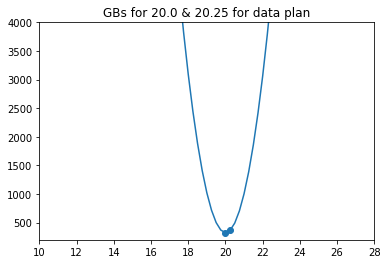

In [14]:
plt.plot(guess_range, loss_over_guesses)
plt.scatter(guess_range[28:30], loss_over_guesses[28:30])
print(guess_range[28:30], loss_over_guesses[28:30])

plt.title(f"GBs for {guess_range[28]} & {guess_range[29]} for data plan")
plt.xlim(10, 28)
plt.ylim(200, 4000)
plt.show()

**Step 1**: Find $f(x)$

Let's take take our objective function Mean squared error: 

MSE OR f(x) = ${ \frac{1}{N}\sum_{i=1}^{N} (x_{i} - \hat{x})^2}$


and plug in our estimate of 20, we get our $f(x)$ , 258 

So we now have:

$ f'(x) = \lim_{h \to 0} \frac{f(x+h) - 258}{h}$  

**Step 2**: Let's use .25 as our $h$ and get our value for $f(x+h)$

Plugging in 20 + .25 into our objective function, we get our $f(x + h)$, 282

So we now have:

$ f'(x) = \lim_{h \to 0} \frac{282 - 258}{.25}$ = 96


That's the derivative of this function -- the slope of the tangent line at that point -- but what can we do with it.. well when we look at it from the perspective of our objective (loss) function we can see which direction we should bump our parameters of the model! 

### Notation

**Different ways to denote a derivative**

$\frac{dy}{dx}$

$f'(x)$

$\dot y$

**Different ways to denote an integral**

$\int y'\$

$f^{(-1)}(x)$

#### Basic derivative properties

Assuming *c* and *n* to be real constants, then these theorems hold true:

$ \frac{d}{dx}c = 0 $  

$ \frac{d}{dx}x = 1 $

$ \frac{d}{dx}(c \cdot f(x)) = c \cdot \frac{d}{dx}f(x) = c \cdot f'(x) $  

$ \frac{d}{dx}(f(x) + g(x)) = f'(x) + g'(x) $  (true for minus as well)  
   

and if you want [proofs.](http://www2.bc.cc.ca.us/resperic/Math6A/Lectures/ch2/3/DerivativeRuleProofs.htm)

### More advanced rules

#### The power rule
When X has an exponeonent then the derivative of the product $fg$ with respect to x is given by

$ \frac{d}{dx}x^n = n \cdot x^{n-1} $

Geometric Example of  $x^{2}$

<img src="imgs/power_rule.png" width="400" height="400">

#### The product rule
If f(x) and g(x) are differentiable functions, then the derivative of the product $fg$ with respect to x is given by  

$ (f \cdot g)' = f'g + fg' $  

<img src="imgs/product_rule.png" width="400" height="400">


#### The chain rule
If f(x) and g(x) are differentiable functions, then the derivative of the composition of g with f is 

$ \frac{d}{dx}(g(f(x)) = g'(f(x)) \cdot f'(x) $  

where the notation $g'(f(x))$ means the function $g'(x)$ evaluated at $f(x)$.


#### The quotient rule
If f(x) and g(x) are differentiable functions and g(x) is not equal to zero, then the derivative of the quotient $f/g$ with respect to x is given by  

$ (\frac{f}{g})' = \frac{gf' - fg'}{g^2} $  

I have nothing great for this, and to be honest I always move the denominator up to the numerator and can then use the product/chain rule.

### Partial Derivatives & Gradient


Partial Derivatives are typically denoted by one of the symbols below: 
$f'_x, f_x, \partial_x f,\ D_xf, D_1f, \frac{\partial}{\partial x}f, \text{ or } \frac{\partial f}{\partial x}$

A partial derivatives means there is more than one variable.. for example, if you were trying to fit a model to predice a house price on sq. footage & zip code. the formulas would be 

House Price f(x) = Sq Footage * W1 + Zip Code * W2 + Intercept 

We would need to figure out what weight to give each feature.. we would consider each feature independently while treating the other as a constant.. that's the gist of partial derivaties!!

As an aside when we keep track of many partial derivaties at once, we call that a **gradient** and it will usually look like this:

$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top$

#### Multiple Variable MSE

<img src="imgs/gradient.jpeg" width="400" height="400">

[img source](https://www.experfy.com/blog/ai-ml/gradient-descent/)

### References 

[Three Blue One Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)

[Calculus Made Easy](https://www.amazon.com/Calculus-Made-Easy-2020-New/dp/B08QLSWHYY/ref=asc_df_B08QLSWHYY/?tag=hyprod-20&linkCode=df0&hvadid=475772153738&hvpos=&hvnetw=g&hvrand=11522055199670254569&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9029969&hvtargid=pla-1092273483061&psc=1)

---

## Exercises

1. Plot the function $y = f(x) = x^3 - \frac{1}{x}$ and its tangent line when $x = 1$.
1. Find the gradient of the function $f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$.
1. What is the gradient of the function $f(\mathbf{x}) = \|\mathbf{x}\|_2$?
1. Can you write out the chain rule for the case where $u = f(x, y, z)$ and $x = x(a, b)$, $y = y(a, b)$, and $z = z(a, b)$?

---

## Exercise Solutions

1. Plot the function $y = f(x) = x^3 - \frac{1}{x}$ and its tangent line when $x = 1$.

In [15]:
def f(x):
    return x**3 - (1/x)

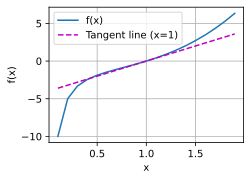

In [16]:
x = np.arange(0.1, 2, 0.1)
plot(x, [f(x), 4*x - 4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

**Note:** the chapter did not show you how to find the tangent line at a specific point so the procedure is as follows. We first take the derivative of $f(x) = x^3 - \frac{1}{x}$, so $f'(x) = 3x^2 + x^{-2}$. When $x=1$ this is $f'(1) = 3 \cdot 1^2 + 1^{-2} = 4$, which gives us our intercept. Now we need to find a point on the line in order to find the y-intercept of the tangent line. We know that the tangent line and the original function are equivalent when $x=1$, $f(1) = 1^3 - \frac{1}{1} = 0$. This means the point $(1, 0)$ is on the tangent line. Remember our general equation for a line, $y = mx + b$ where $m$ is the slope and $b$ is the y-intercept, we can solve for $b$ as follows: $0 = 4 \cdot 1 + b \implies b = -4$ so our tangent line will be $y = 4x -4$.

---

2. Find the gradient of the function $f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$.

**Solution:**

The gradient will be a vector of values because the input is a vector.

$$\nabla_\mathbf{x}f(\mathbf{x}) = 
\begin{bmatrix}
\frac{\partial f(\mathbf{x})}{\partial x_1} \\
\frac{\partial f(\mathbf{x})}{\partial x_2}
\end{bmatrix}
=
\begin{bmatrix}
6x_1 \\
5e^{x_2}
\end{bmatrix}
$$

---

3. What is the gradient of the function $f(\mathbf{x}) = \|\mathbf{x}\|_2$?

**Solution:**
Let us first remind ourselves what the $L_2$ norm function looks like.

$$f(\mathbf{x}) = \|\mathbf{x}\|_2 = (\sum_{i=1}^{n}{x_i^2})^{1/2}$$

Now let's consider the first entry in $\mathbf{x}$, $x_1$, and think about what the partial derivative of $f(\mathbf{x})$ is with respect to $x_1$. Applying the chain rule, we have:

$$\frac{\partial f(\mathbf{x})}{\partial x_1} = \frac{1}{2}(\sum_{i=1}^{n}{x_i^2})^{-1/2} \cdot 2x_1 = \frac{x_1}{(\sum_{i=1}^{n}{x_i^2})^{1/2}} = \frac{x_1}{\|\mathbf{x}\|_2}$$

Happily, this pattern continues for all the $n$ entries in $\mathbf{x}$ so we get a gradient vector that looks like the following.

$$\nabla_\mathbf{x}f(\mathbf{x}) = 
\begin{bmatrix}
\frac{\partial f(\mathbf{x})}{\partial x_1} \\
\frac{\partial f(\mathbf{x})}{\partial x_2} \\
\vdots \\
\frac{\partial f(\mathbf{x})}{\partial x_n}
\end{bmatrix}
=
\begin{bmatrix}
\frac{x_1}{\|\mathbf{x}\|_2} \\
\frac{x_2}{\|\mathbf{x}\|_2} \\
\vdots \\
\frac{x_n}{\|\mathbf{x}\|_2}
\end{bmatrix}
$$

---

4. Can you write out the chain rule for the case where $u = f(x, y, z)$ and $x = x(a, b)$, $y = y(a, b)$, and $z = z(a, b)$?

**Solution:**
Since we have two "base" inputs, $a$ and $b$, we will get two derivative chains corresponding to $a$ and $b$

$$\frac{du}{da} = \frac{\partial u}{\partial x}\cdot\frac{\partial x}{\partial a} + \frac{\partial u}{\partial y}\cdot\frac{\partial y}{\partial a} + \frac{\partial u}{\partial z}\cdot\frac{\partial z}{\partial a}$$

$$\frac{du}{db} = \frac{\partial u}{\partial x}\cdot\frac{\partial x}{\partial b} + \frac{\partial u}{\partial y}\cdot\frac{\partial y}{\partial b} + \frac{\partial u}{\partial b}\cdot\frac{\partial z}{\partial b}$$